## Problem Statement

A consumer finance company specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.  

The aim is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
# Importing all libraries required
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

loan = pd.read_csv('loan.csv')

## Data understanding, Data Cleaning and Manipulation

In [3]:
# Checking shape of the dataset
print('Shape of Dataset: ',loan.shape)

Shape of Dataset:  (39717, 111)


In [4]:
# Checking columns in Dataset
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Check for Duplicate values and Null Values

In [5]:
# Check for duplicate rows in dataset based on id column

print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup

# There are no duplicate rows in loan dataset

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [6]:
# Checking Null values in each Rows
print('Number of Rows with all Null values:', loan.isnull().all(axis=1).sum())

# Checking Null values in each column
print('Number of Columns with all null values:',loan.isnull().all().sum())

Number of Rows with all Null values: 0
Number of Columns with all null values: 54


### Observation
There are 0 rows with all Null values and 54 columns with all values as Null.

In [7]:
# Dropping columns with all null values
loan = loan.dropna(how= 'all',axis=1)

In [8]:
# Identifying columns with only 1 unique value and dropping as it will not contribute to analysis
drop_cols1 = [col for col in list(loan) if loan[col].nunique() <= 1]
loan.drop(drop_cols1, axis=1, inplace = True)

In [9]:
# Checking null value in columns
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [10]:
# Dropping columns with high number of Null values
drop_cols2 = ['mths_since_last_record','next_pymnt_d','mths_since_last_delinq']
loan.drop(drop_cols2, axis=1, inplace = True)

### Finding irrelevant columns

We are analyzing driving factors behind loan defaulting.
So we can safely remove some columns / variables that are irrelevant to analysis.

- Columns: "id", "member_id", "emp_title", "url", "title" contain irrelevant information and doesn't affect our analysis.
- Column "zip_code" does not have all the digits and same info is present in column "addr_state"
- Column "desc" has description (text data) which we cannot be analyzed. So removing the column.

#### Following Columns contain values that are pertaining to post loan approval and does not affect the analysis
- Columns: 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
- 'recoveries','collection_recovery_fee','last_pymnt_d'&'last_pymnt_amnt'

Hence removing these columns.

In [11]:
drop_cols3 = ['id', 'member_id','emp_title', 'url', 'title' , 'zip_code','desc','out_prncp','out_prncp_inv','total_pymnt',
              'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
              ,'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
loan.drop(drop_cols3, axis=1, inplace = True)

In [12]:
# Checking shape of the dataset after above Data cleaning steps
print('Shape of Dataset: ',loan.shape)

Shape of Dataset:  (39717, 27)


In [13]:
# Remaining columns
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### Handling Missing Values

In [14]:
# Checking Missing values in columns
loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [15]:
# Checking for values in column 'Emp_length', 'revol_util','last_credit_pull_d','pub_rec_bankruptcies'
print(loan.emp_length.value_counts())
print(loan.revol_util.value_counts())
print(loan.last_credit_pull_d.value_counts())
print(loan.pub_rec_bankruptcies.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64
revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64
last_credit_pull_d
May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: count, Length: 106, dtype: int64
pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


In [16]:
# Imputing with mode value for column 'pub_rec_bankruptcies'
# Count of mode value is very high hence imputing doesn't affect distribution
loan.pub_rec_bankruptcies.fillna(0.0, inplace = True)

In [17]:
#Dropping rows with null values
loan.dropna(axis = 0, subset = ['emp_length','revol_util','last_credit_pull_d'] , inplace = True)

In [18]:
# Checking shape of the dataset after handling Missing values
print('Shape of Dataset: ',loan.shape)

Shape of Dataset:  (38593, 27)


### Standardizing data

In [19]:
loan[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,38593.000000,38593.000000,38593.000000
mean,11300.060244,11025.196927,10464.125663
std,7461.902905,7192.764750,7139.335309
min,500.000000,500.000000,0.000000
25%,5500.000000,5500.000000,5000.000000
50%,10000.000000,9975.000000,9000.000000
75%,15000.000000,15000.000000,14441.513900
max,35000.000000,35000.000000,35000.000000


In [20]:
# Dropping columns 'funded_amnt' and 'funded_amnt_inv' as distribution is similar to loan amount and hence
# considering only loan_amnt for the analysis
loan.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace = True)

In [21]:
# Checking datatypes of the dataset
loan.dtypes

loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

In [22]:
# Checking for values in column 'term'
loan['term'].value_counts()

term
 36 months    28241
 60 months    10352
Name: count, dtype: int64

In [23]:
loan['term'] = loan['term'].apply(lambda x: x.split(' ')[1]).astype('int64')
loan.rename(columns = {'term': 'term_in_mnths'}, inplace = True)

In [24]:
# Checking for values in column 'int_rate'
loan['int_rate'].value_counts()

int_rate
10.99%    932
13.49%    813
11.49%    800
7.51%     756
7.88%     701
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [25]:
# Converting to Numeric for analysis
loan['int_rate'] = loan['int_rate'].apply(lambda x: x.rstrip('%')).astype('float')
loan.rename(columns = {'int_rate': 'int_rate_%'}, inplace = True)

In [26]:
# Converting according to data dictionary for analysis
loan['emp_length'] = loan['emp_length'].astype('str').apply(lambda x: 0 if "<" in x else (x.split('+')[0] 
                                                                                          if "+" in x else x.split()[0]))
loan['emp_length'] = loan['emp_length'].astype('int64')

In [27]:
# Checking for values in column 'home_ownership'
loan['home_ownership'].value_counts()

home_ownership
RENT        18456
MORTGAGE    17202
OWN          2836
OTHER          96
NONE            3
Name: count, dtype: int64

In [28]:
# Replacing None with Other as per key from data dictionary
loan['home_ownership'] = loan['home_ownership'].replace('NONE','OTHER')

In [29]:
# Converting to Numeric for analysis
loan['revol_util'] = loan['revol_util'].apply(lambda x: x.rstrip('%')).astype('float')

In [30]:
# Converting date column from object to datetime
loan.issue_d = pd.to_datetime(loan.issue_d, format ='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format ='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format ='%b-%y')

In [31]:
loan.dtypes

loan_amnt                        int64
term_in_mnths                    int64
int_rate_%                     float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
last_credit_pull_d      datetime64[ns]
pub_rec_bankruptcies           float64
dtype: object

### Checking for Outliers

<Axes: xlabel='loan_amnt'>

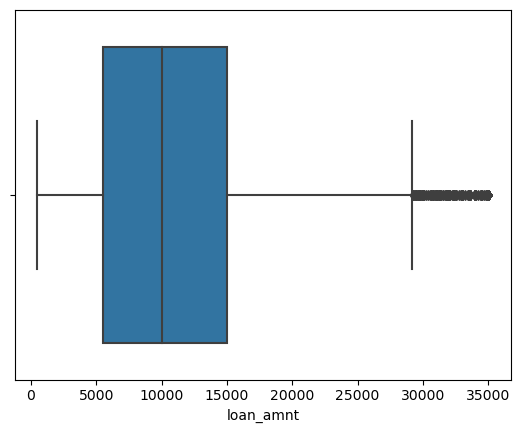

In [32]:
# Checking distribution of loan_amnt
sns.boxplot(x = loan.loan_amnt)

<Axes: xlabel='annual_inc'>

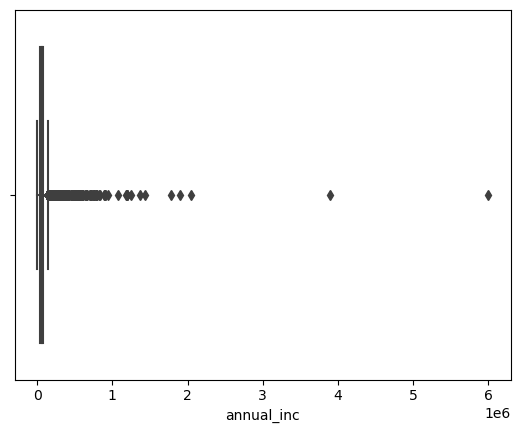

In [33]:
# Checking distribution of annual_inc
sns.boxplot(x=loan.annual_inc)

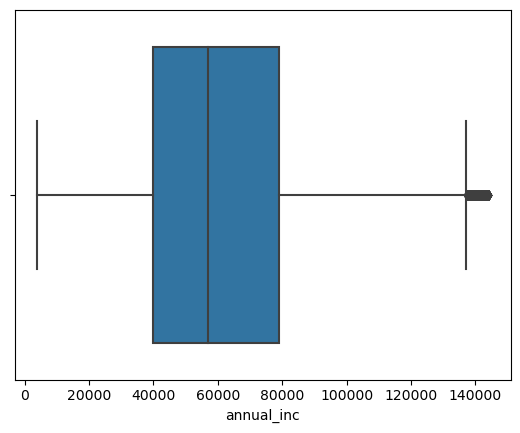

In [34]:
# As some values are far from distribution considering values till 95th percentile for analysis
loan = loan[loan['annual_inc'] <= loan.annual_inc.quantile(q = 0.95)]
sns.boxplot(x=loan.annual_inc)
plt.show()

### Dataset now looks clean for analysis

### Univariate analysis

count    36697.000000
mean     10931.689920
std       7168.649469
min        500.000000
25%       5350.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


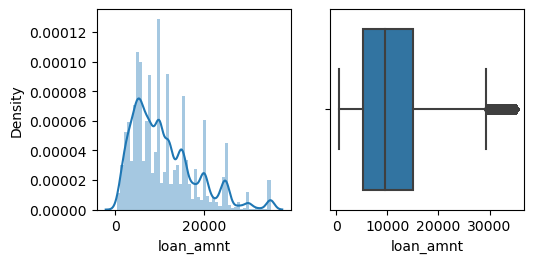

In [35]:
# Analysing loan_amnt

print(loan['loan_amnt'].describe())

# Plotting on distplot and boxplot

fig, ax = plt.subplots(figsize=(5,5))
fig.tight_layout()
plt.subplot(221)
sns.distplot(loan.loan_amnt)
plt.subplot(222)
sns.boxplot(x=loan.loan_amnt)

plt.show()

##### Observations
Median loan amount is 9600 and IQR is 9650

Min loan_amt is 500 and Max loan_amt is 35000 

count    36697.000000
mean        11.999593
std          3.689375
min          5.420000
25%          9.250000
50%         11.860000
75%         14.460000
max         24.400000
Name: int_rate_%, dtype: float64


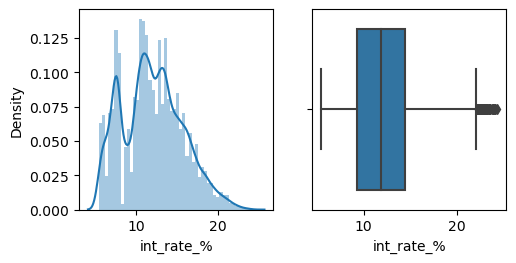

In [36]:
# Analysing int_rate_%

print(loan['int_rate_%'].describe())

# Plotting on distplot and boxplot

fig, ax = plt.subplots(figsize=(5,5))
fig.tight_layout()
plt.subplot(221)
sns.distplot(loan['int_rate_%'])
plt.subplot(222)
sns.boxplot(x = loan['int_rate_%'])

plt.show()

###### Observations
Median int rate is 11.9% and IQR is 5.21%

Min int rate is 5.42% and Max int rate is 24.4%

count     36697.000000
mean      61759.963420
std       27909.358897
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78948.000000
max      144000.000000
Name: annual_inc, dtype: float64


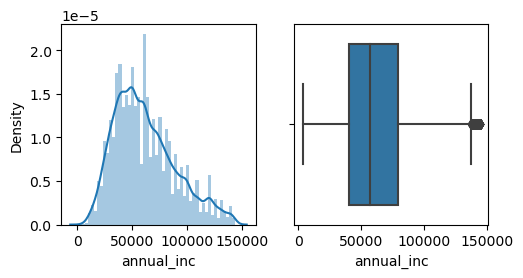

In [37]:
# Analysing annual_inc
print(loan['annual_inc'].describe())

# Plotting on distplot and boxplot

fig, ax = plt.subplots(figsize=(5,5))
fig.tight_layout()
plt.subplot(221)
sns.distplot(loan['annual_inc'])
plt.subplot(222)
sns.boxplot(x = loan['annual_inc'])

plt.show()

###### Observations
Median annual_inc is 57000 and IQR is 38000

Min annual_inc is 4000 and Max annual inc is 144000

In [38]:
# Function for displaying percentage labels
# without Hue
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
        
# with Hue
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 3 - 0.05
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

### Categorical variables

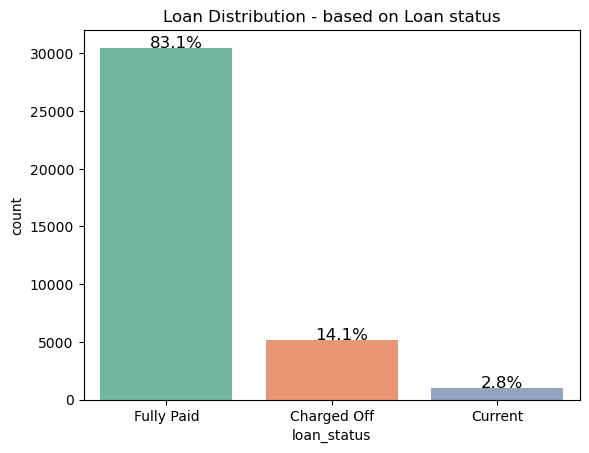

In [39]:
# Analysing loan_status
ax = sns.countplot(x = 'loan_status', data = loan, palette= 'Set2')
plt.title("Loan Distribution - based on Loan status")
without_hue(ax, loan.loan_status)
plt.show()

#### Observation
83% loans were paid while 14% constitutes loan which were defaulted

In [40]:
# As we are concerned only about default and non default loans, dropping rows with loan status as Current
loan.drop(loan[loan['loan_status'] == 'Current'].index, inplace = True)

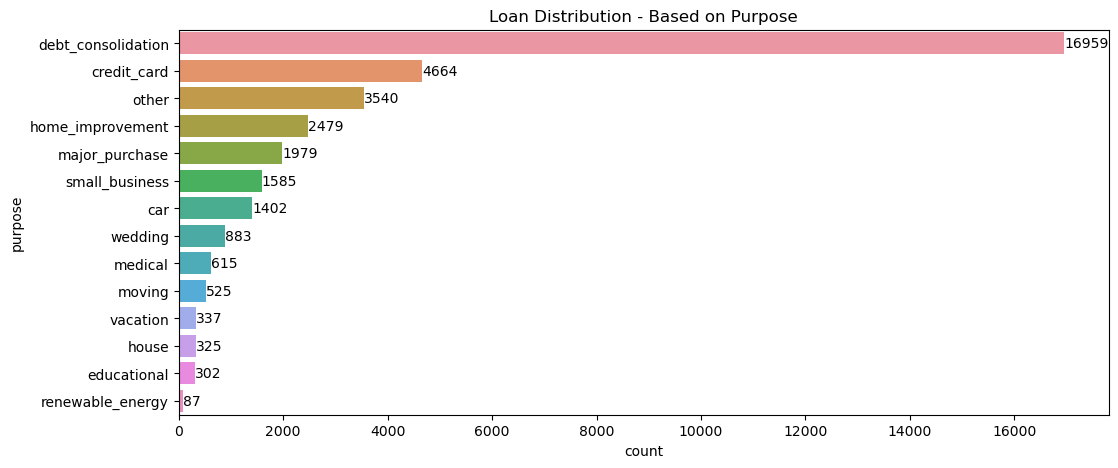

In [41]:
# Analysing purpose
plt.figure(figsize=(12,5))
ax = sns.countplot(y = 'purpose', data = loan, order=loan['purpose'].value_counts(ascending  = False ).index)
ax.bar_label(ax.containers[0])
plt.title('Loan Distribution - Based on Purpose')
plt.show()

##### Observations
Most of the loans are taken for debt_consolidation followed by Credit card and other 

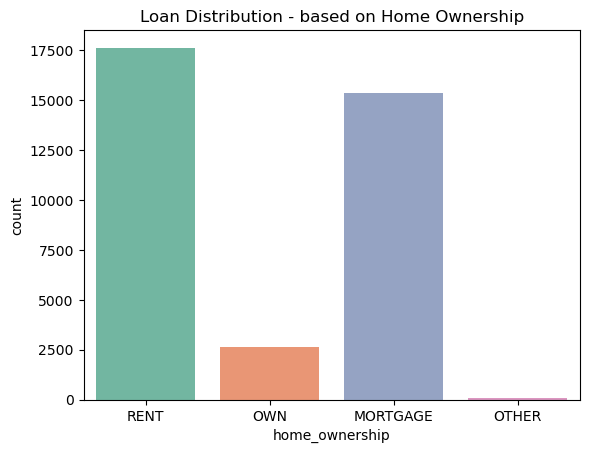

In [42]:
# Analysing home_ownership
ax = sns.countplot(x = 'home_ownership', data = loan, palette= 'Set2')
plt.title("Loan Distribution - based on Home Ownership")
plt.show()

##### Observations
Most of the loans are taken by people who have Home ownership as either Rent or Mortgage

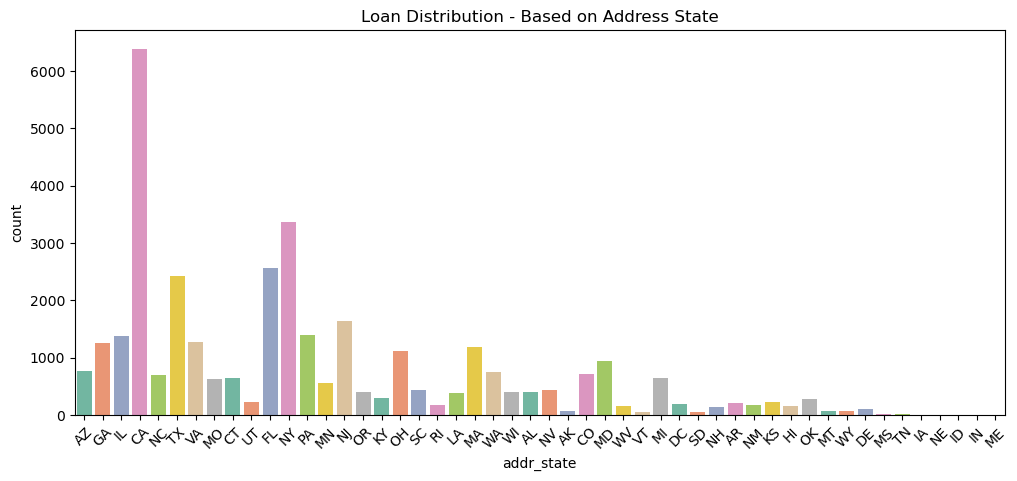

In [43]:
# Analysing addr_state
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'addr_state', data = loan, palette= 'Set2')
plt.title("Loan Distribution - Based on Address State")
plt.xticks(rotation=45)
plt.show()

##### Observations
Most of the loans are taken by people from state CA and NY

#### Derive Columns For Analysis -

In [44]:
# Creating month and year columns separately from issue_date

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_year']=pd.DatetimeIndex(loan['issue_d']).year
loan['issue_month']=pd.DatetimeIndex(loan['issue_d']).month


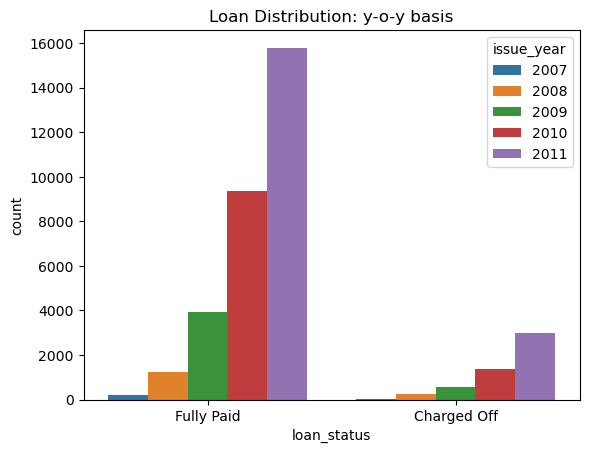

In [45]:
ax = sns.countplot(x = 'loan_status', hue = 'issue_year', data = loan)
plt.title("Loan Distribution: y-o-y basis")
plt.show()

#### Observation
 - High numbers of loans were granted in 2011, same is reflecting in number of charged off loans

In [46]:
# Categorise loan amounts into buckets
loan['loan_amnt_cat'] = pd.cut(loan['loan_amnt'], bins =5)

# categorise annual incomes into buckets
loan['annual_inc_cat'] = pd.cut(loan['annual_inc'], bins =5)

# categorise intrest rates into buckets
loan['int_rate_cat'] = pd.cut(loan['int_rate_%'], bins =5)

#categorise dti into buckets
loan['dti_cat'] = pd.cut(loan['dti'],bins =5)

#categorise installment into buckets
loan['installment_cat'] = pd.cut(loan['installment'], bins =5)


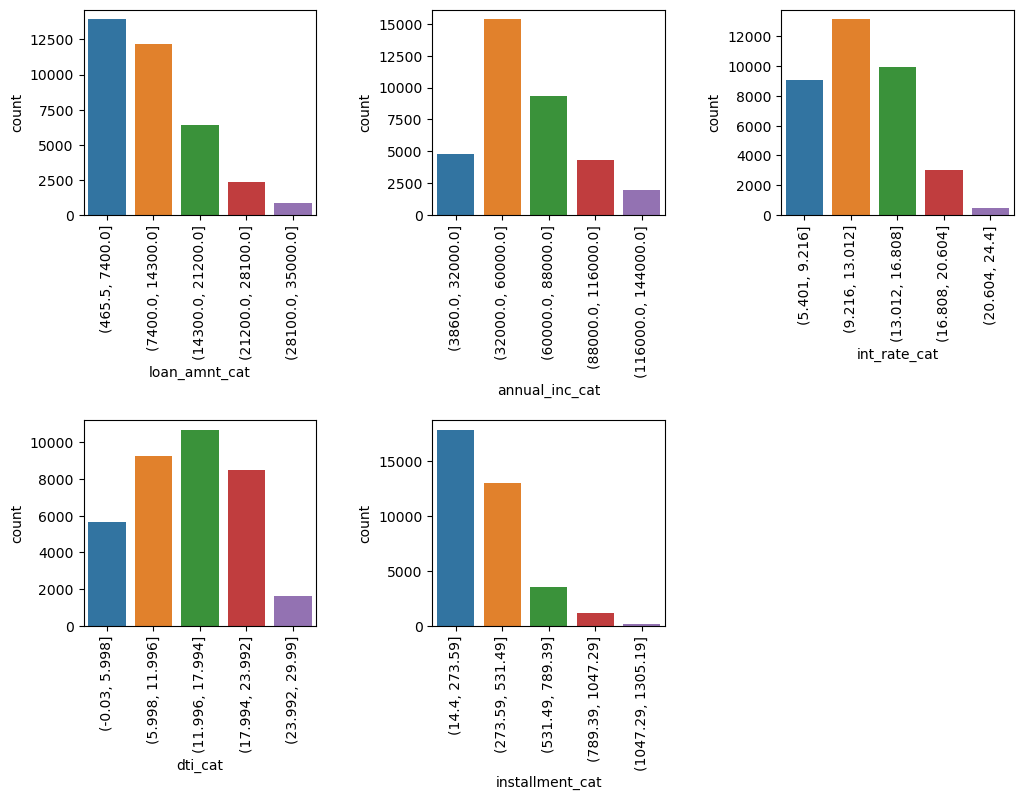

In [47]:
# Plotting Derived Columns for Charged off Loans

fig, ax = plt.subplots(figsize=(12,8))
fig.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(231)
sns.countplot(x = loan['loan_amnt_cat'], data = loan[loan['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)

plt.subplot(232)
sns.countplot(x = loan['annual_inc_cat'], data = loan[loan['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)

plt.subplot(233)
sns.countplot(x = loan['int_rate_cat'], data = loan[loan['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)

plt.subplot(234)
sns.countplot(x = loan['dti_cat'], data = loan[loan['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)

plt.subplot(235)
sns.countplot(x = loan['installment_cat'], data = loan[loan['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)


plt.show()

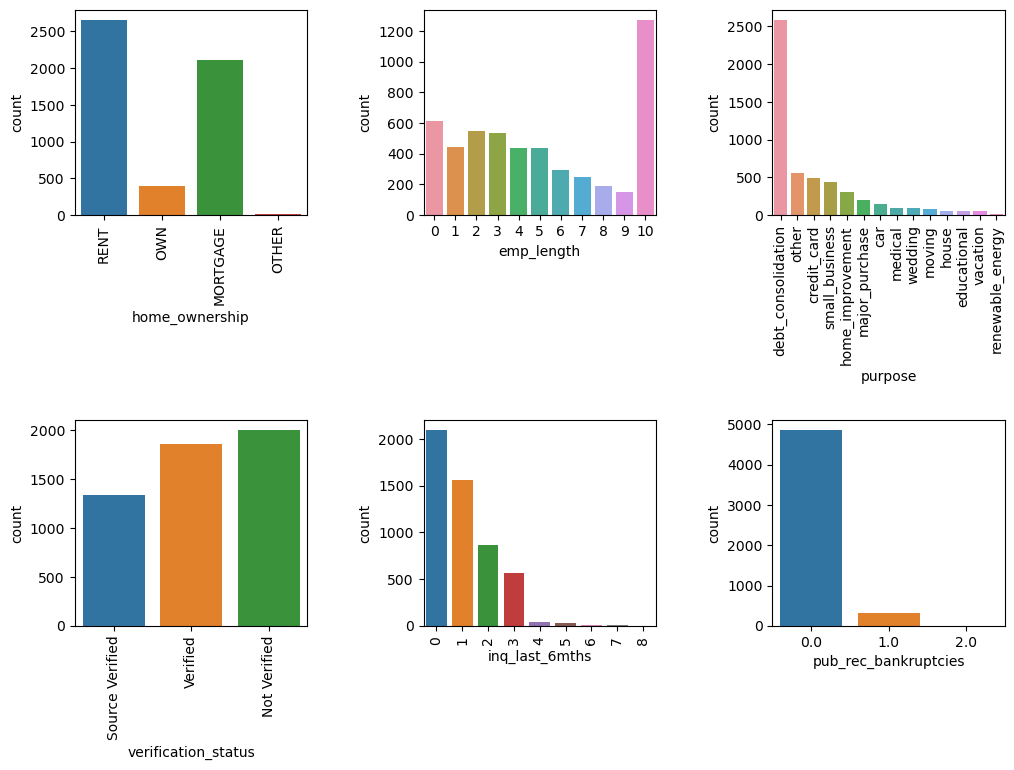

In [48]:
# Plotting Categorical Columns for Charged off Loans
fig, ax = plt.subplots(figsize=(12,8))
fig.subplots_adjust(hspace = 1, wspace = 0.5)

plt.subplot(231)
sns.countplot(x = 'home_ownership', data = loan[loan['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)

plt.subplot(232)
sns.countplot(x = 'emp_length', data = loan[loan['loan_status'] == 'Charged Off'])

plt.subplot(233)
sns.countplot(x = 'purpose', data = loan[loan['loan_status'] == 'Charged Off'],
              order=loan[loan['loan_status'] == 'Charged Off']['purpose'].value_counts(ascending  = False ).index)
plt.xticks(rotation=90)

plt.subplot(234)
sns.countplot(x = 'verification_status', data = loan[loan['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)

plt.subplot(235)
sns.countplot(x = 'inq_last_6mths', data = loan[loan['loan_status'] == 'Charged Off'])
plt.xticks(rotation=90)

plt.subplot(236)
sns.countplot(x = 'pub_rec_bankruptcies', data = loan[loan['loan_status'] == 'Charged Off'])

plt.show()


### Observations

Above analysis with respect to the charged off loans for each variable suggests indicates more probability of loan getting default when :

##### Group - Derived variables
- Loan amount is in between 465 to 7400
- Annual Income is between 32000 to 60000
- Interest rate is between 9.2 to 13.0
- dti is between 12 to 18
- Installment is between 14.4 to 273.6

##### Group - Categorical variables
- Applicants having house_ownership as 'RENT'
- Applicants with employement length of 10+ years
- Applicants who took loan for debt consolidation
- Applicants whose status is Not verified
- Applicants for whom no of enquiries in last 6 months is 0
- Applicants for whom no of derogatory public records is 0

### Bivariate Analysis

<Figure size 500x500 with 0 Axes>

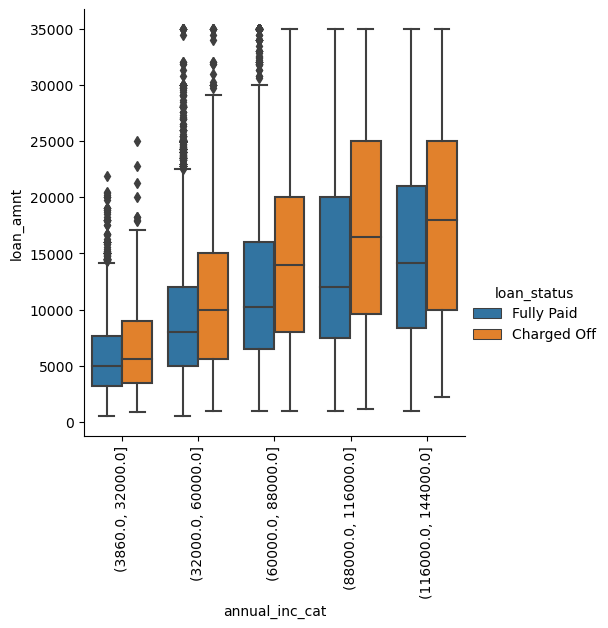

In [49]:
plt.figure(figsize=(5,5))
sns.catplot(x = 'annual_inc_cat', y = 'loan_amnt' , hue = 'loan_status' , kind="box",data = loan)
plt.xticks(rotation = 90)
plt.show()


<Figure size 500x500 with 0 Axes>

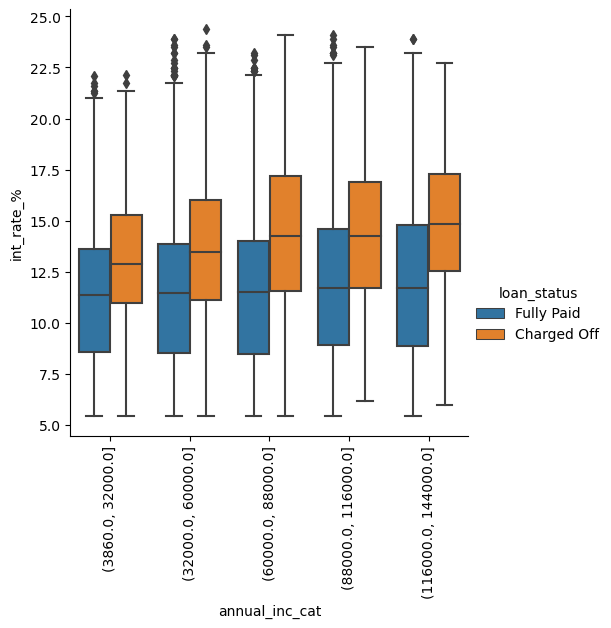

In [50]:
plt.figure(figsize=(5,5))
sns.catplot(x = 'annual_inc_cat', y = 'int_rate_%' , hue = 'loan_status' , kind="box",data = loan)
plt.xticks(rotation = 90)
plt.show()

<Figure size 500x500 with 0 Axes>

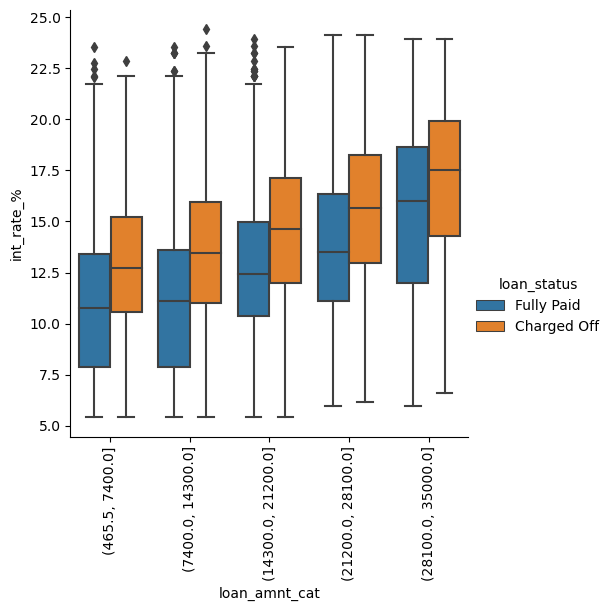

In [51]:
plt.figure(figsize=(5,5))
sns.catplot(x = 'loan_amnt_cat', y = 'int_rate_%' , hue = 'loan_status' , kind="box",data = loan)
plt.xticks(rotation = 90)
plt.show()

##### Observation
- For the same income group, loan amount and interest rate is higher for Charged off loans
- For the same loan amount group, interest rate is higher for Charged off loans
- It can be concluded that for the same loan amount LC is giving loans at higher interest rate to people having lower income

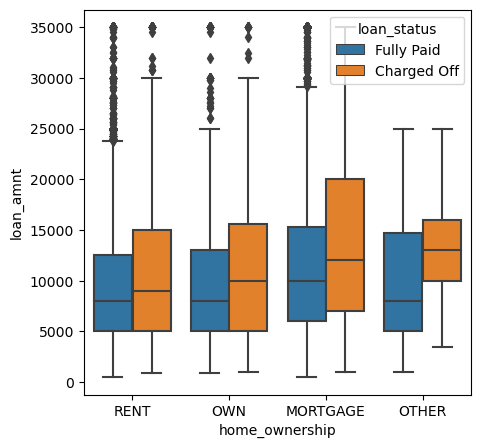

In [52]:
# Plotting home ownership against loan amount
plt.figure(figsize=(5,5))
sns.boxplot(x = 'home_ownership', y = 'loan_amnt', data = loan, hue = 'loan_status')
plt.show()

#### Observation
Persons with home ownership as Mortgage has highest loan amount both in fully paid and Charged off loan status

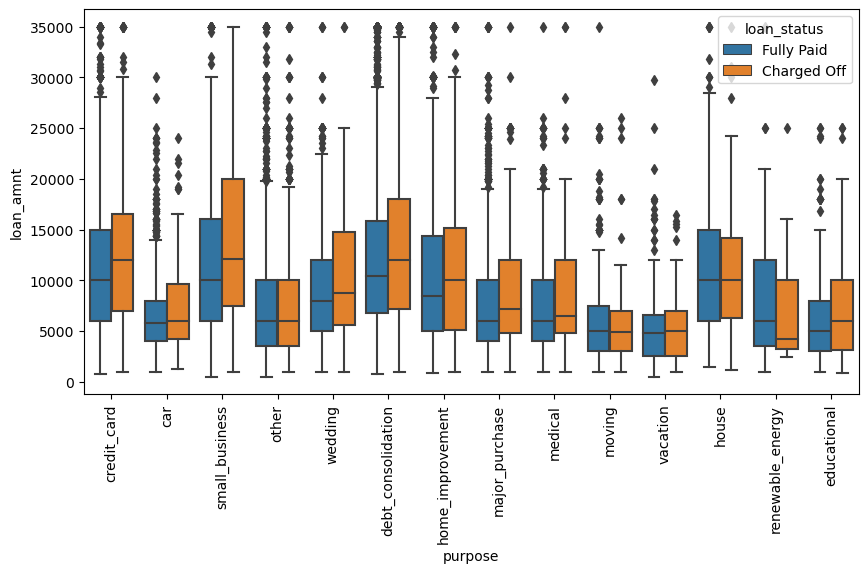

In [53]:
# Plotting purpose against loan amount
plt.figure(figsize=(10,5))
sns.boxplot(x = 'purpose', y = 'loan_amnt', data = loan, hue = 'loan_status')
plt.xticks(rotation =90)
plt.show()

#### Observation
Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business followed by Debt consolidation and Credit card.

In [54]:
loan.columns

Index(['loan_amnt', 'term_in_mnths', 'int_rate_%', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month', 'loan_amnt_cat', 'annual_inc_cat', 'int_rate_cat',
       'dti_cat', 'installment_cat'],
      dtype='object')

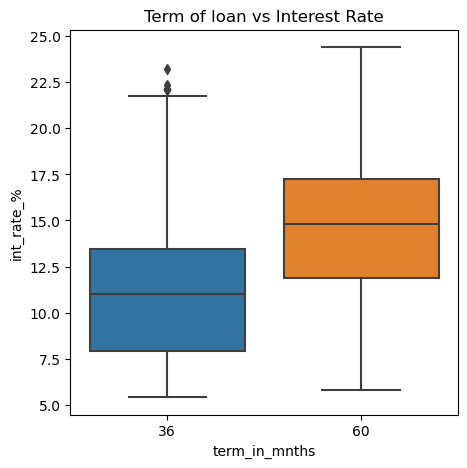

In [55]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(5,5))
sns.boxplot(y = 'int_rate_%', x ='term_in_mnths', data = loan)
plt.title('Term of loan vs Interest Rate')
plt.show()


#### Observations:
Intrest rate is higher for 60 months loan term.
Most of the loans issued for longer term had higher intrest rates for repayement.

In [56]:
# function for Grouping loans by different variables and loan status
def percent_loan(df, col1,col2):
    df1 = df.groupby([col1,'loan_status']).loan_status.count().unstack().reset_index()
    total = (df1['Charged Off'] + df1['Fully Paid'])
    percent_loan_status =  (df1[col2])*100/total
    print(df1)
    return df1, percent_loan_status

# function to plot barplot
def plot_by_cat(col_x, col_y,df,x):
    plt.figure(figsize=(10,5))
    sns.barplot(x = col_x, y = col_y, data = df)
    plt.xticks(rotation = x) 
    plt.show()

loan_status        annual_inc_cat  Charged Off  Fully Paid
0               (3860.0, 32000.0]          850        3896
1              (32000.0, 60000.0]         2423       12930
2              (60000.0, 88000.0]         1215        8090
3             (88000.0, 116000.0]          473        3852
4            (116000.0, 144000.0]          225        1728


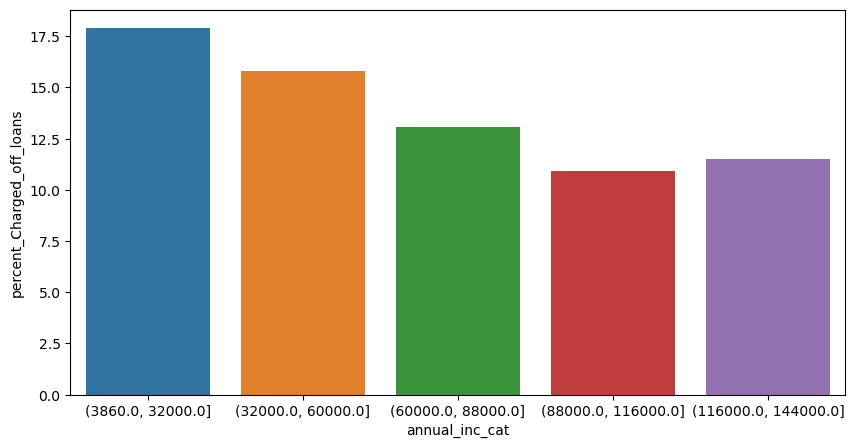

In [57]:
# Bivariate Analysis on annual income and percent Charged off loans
loan_by_annual_inc,loan_by_annual_inc['percent_Charged_off_loans'] = percent_loan(loan,'annual_inc_cat','Charged Off')
plot_by_cat('annual_inc_cat','percent_Charged_off_loans',loan_by_annual_inc,0)

#### Observations:
- Lower Income range 3860-32000 has high percentage of Charged off loans.
- Also note with increase in annual income percentage of Charged off loan decreases. 

loan_status             purpose  Charged Off  Fully Paid
0                           car          153        1249
1                   credit_card          487        4177
2            debt_consolidation         2591       14368
3                   educational           51         251
4              home_improvement          303        2176
5                         house           55         270
6                major_purchase          205        1774
7                       medical           98         517
8                        moving           82         443
9                         other          565        2975
10             renewable_energy           17          70
11               small_business          440        1145
12                     vacation           49         288
13                      wedding           90         793


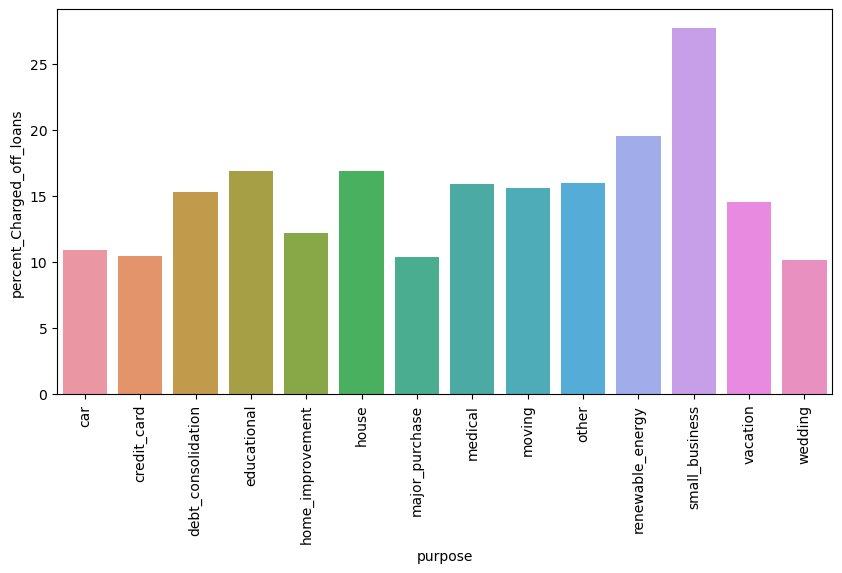

In [58]:
# Bivariate Analysis on purpose of loan and percent Charged off loans
loan_by_purpose,loan_by_purpose['percent_Charged_off_loans'] = percent_loan(loan,'purpose','Charged Off')
plot_by_cat('purpose','percent_Charged_off_loans',loan_by_purpose,90)

#### Observations:
- Loans with purpose of small_business has high percentage (more than 25% )of Charged off loans

loan_status      int_rate_cat  Charged Off  Fully Paid
0              (5.401, 9.216]          533        8553
1             (9.216, 13.012]         1690       11461
2            (13.012, 16.808]         1887        8081
3            (16.808, 20.604]          886        2136
4              (20.604, 24.4]          190         265


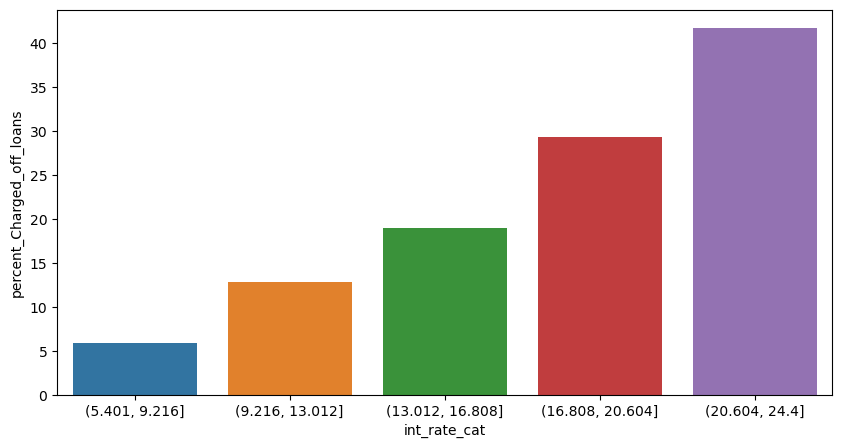

In [59]:
# Bivariate Analysis on interest rate and percent Charged off loans
loan_by_int_rate,loan_by_int_rate['percent_Charged_off_loans'] = percent_loan(loan,'int_rate_cat','Charged Off')
plot_by_cat('int_rate_cat','percent_Charged_off_loans',loan_by_int_rate,0)

#### Observations:
- Loans with higher int rate 20 to 24.4 has high percentage of Charged off loans.
- Also note with increase in int rate percentage of Charged off loan also increases.

loan_status home_ownership  Charged Off  Fully Paid
0                 MORTGAGE         2117       13204
1                    OTHER           17          77
2                      OWN          391        2258
3                     RENT         2661       14957


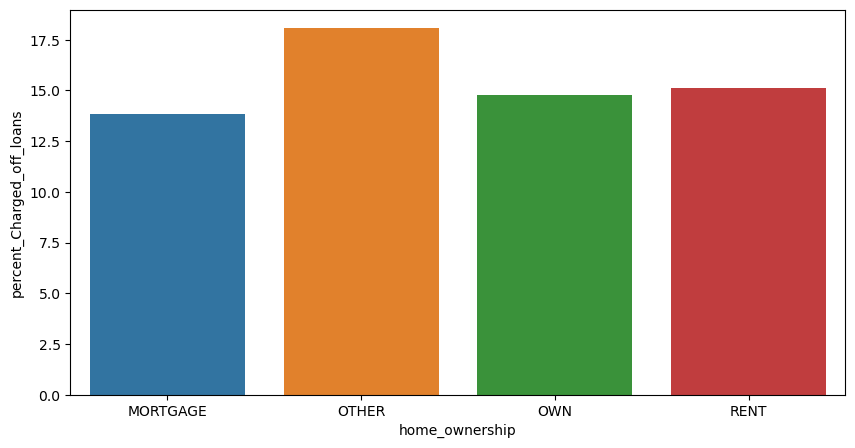

In [60]:
# Bivariate Analysis on Home Ownership and percent Charged off loans
loan_by_home_ownership,loan_by_home_ownership['percent_Charged_off_loans'] = percent_loan(loan,'home_ownership','Charged Off')
plot_by_cat('home_ownership','percent_Charged_off_loans',loan_by_home_ownership,0)

#### Observations:
- Above trend shows almost equal distribution of percentage of Charged off loans against home ownership.

loan_status  emp_length  Charged Off  Fully Paid
0                     0          613        3712
1                     1          446        2599
2                     2          547        3559
3                     3          537        3291
4                     4          441        2759
5                     5          439        2606
6                     6          293        1781
7                     7          252        1391
8                     8          193        1151
9                     9          150        1004
10                   10         1275        6643


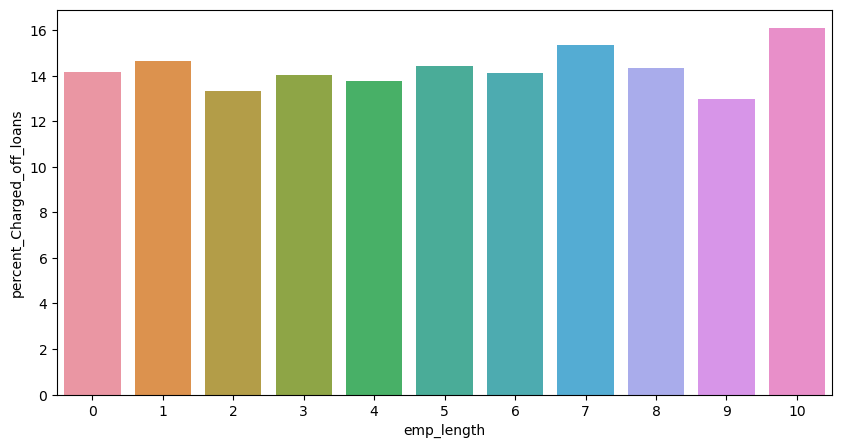

In [61]:
# Bivariate Analysis on Employment length and percent Charged off loans
loan_by_emp_length,loan_by_emp_length['percent_Charged_off_loans'] = percent_loan(loan,'emp_length','Charged Off')
plot_by_cat('emp_length','percent_Charged_off_loans',loan_by_emp_length,0)

#### Observations:
- Above trend shows almost equal distribution of percentage of Charged off loans when compared with employment length of applicant

loan_status addr_state  Charged Off  Fully Paid
0                   AK         13.0        56.0
1                   AL         48.0       357.0
2                   AR         25.0       195.0
3                   AZ        107.0       662.0
4                   CA       1025.0      5365.0
5                   CO         89.0       633.0
6                   CT         86.0       570.0
7                   DC         13.0       181.0
8                   DE         11.0        94.0
9                   FL        462.0      2110.0
10                  GA        204.0      1049.0
11                  HI         28.0       128.0
12                  IA          NaN         5.0
13                  ID          1.0         4.0
14                  IL        190.0      1183.0
15                  IN          NaN         9.0
16                  KS         25.0       209.0
17                  KY         45.0       255.0
18                  LA         50.0       343.0
19                  MA        141.0     

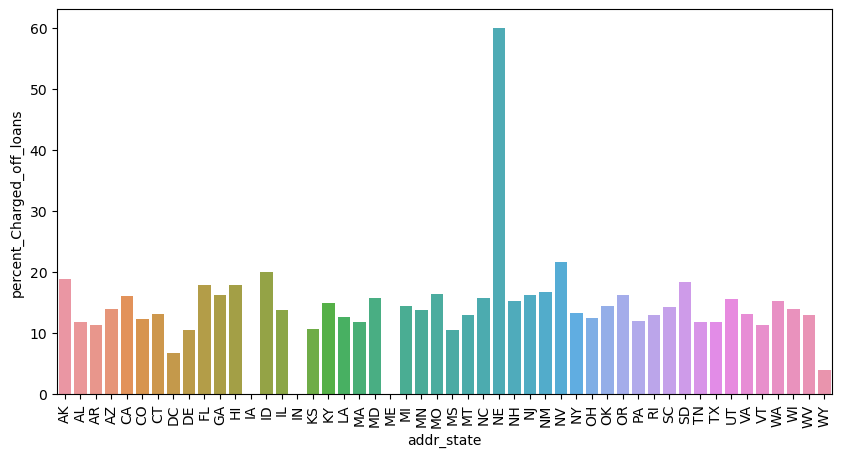

In [62]:
# Bivariate Analysis on Address state and percent Charged off loans
loan_by_state,loan_by_state['percent_Charged_off_loans'] = percent_loan(loan,'addr_state','Charged Off')
plot_by_cat('addr_state','percent_Charged_off_loans', loan_by_state,90)

#### Observations:
States NE has very high chances of charged off but number of applications are too low for any conclusions.

loan_status verification_status  Charged Off  Fully Paid
0                  Not Verified         1998       13864
1               Source Verified         1334        7657
2                      Verified         1854        8975


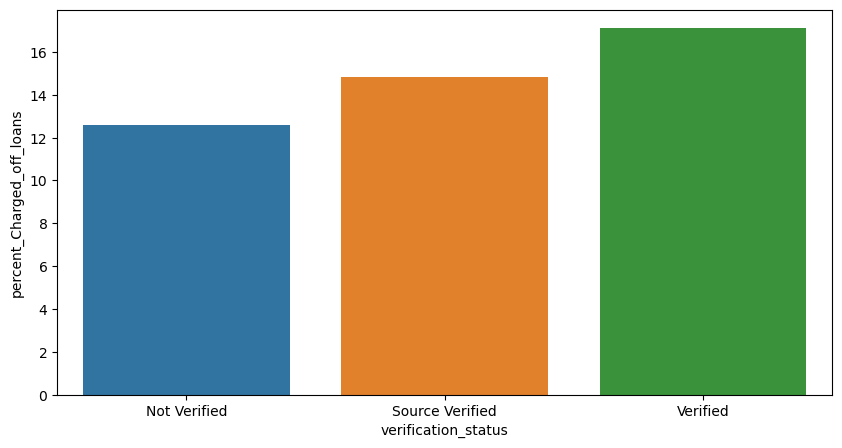

In [63]:
# Bivariate Analysis on verification status and percent Charged off loans
loan_by_verify,loan_by_verify['percent_Charged_off_loans'] = percent_loan(loan,'verification_status','Charged Off')
plot_by_cat('verification_status','percent_Charged_off_loans', loan_by_verify,0)

#### Observations:
- Above trend shows almost equal distribution of percentage of Charged off loans when compared with verification status

loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid
0                             0.0         4854       29329
1                             1.0          330        1164
2                             2.0            2           3


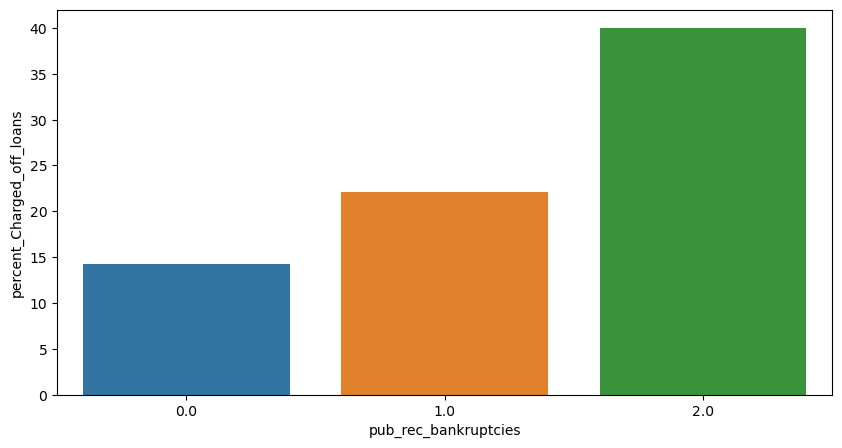

In [64]:
# Bivariate Analysis on Public bankruptcies record and percent Charged off loans
loan_by_bankruptcies,loan_by_bankruptcies['percent_Charged_off_loans'] = percent_loan(loan,'pub_rec_bankruptcies','Charged Off')
plot_by_cat('pub_rec_bankruptcies','percent_Charged_off_loans', loan_by_bankruptcies,0)

#### Observations:
- Above trend shows very high percent of Charged off loans in case of '2' no of public record bankruptcies